In [0]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
df = spark.read.csv('/FileStore/rotten_tomatoes_reviews.csv', header=True, inferSchema=True) \
    .withColumnRenamed('Freshness', 'label')
df.show(truncate=False)

+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
label|Review |
+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
1 | Manakamana doesn't answer any questions, yet makes its point: Nepal, like the rest of our planet, is a picturesque but far from peaceable kingdom. |
1 | Wilfully offensive and powered by a chest-thumping machismo, but it's good clean fun. |
0 | It would be difficult to imagine material more wrong for Spade than Lost & Found. |
0 | Despite the gusto its star brings to the role, it's hard to ride shotgun on Hector's voyage of discovery. |
0 | If there was a good idea at the core of this film, it's been buried in an unsightly pile of flatulence jokes, dog-related bad puns and a ridiculous serial arson plot. |
0 | Gleeson goes the Hallmark Channel route, damaging an intermittently curious entry in the time travel subgenre. |
1 | It was the height of satire in 1976: dark as hell, but patently absurd and surely nowhere close to objective reality. Objective reality surpassed it somewhere in the Jerry Springer era. |
0 |" Everyone in ""The Comedian"" deserves a better movie than ""The Comedian.""" |
0 | Actor encourages grumpy Christians to embrace the season. |
1 | Slight, contained, but ineffably soulful. |
1 | Bell's debut feature addresses its subject with both humor and intelligence, approaching the issue of performance enhancement from every conceivable angle |
1 | ... except for its shamelessly (and irresistibly) zingy music score (by the director), Halloween achieves its considerable power almost entirely through visual means. |
0 | This is not one for the uninitiated. It's also not one for people who like action and thrills. |
1 | Son of Saul employs the formal mechanics of filmmaking to turn [its] ... questions back in on and around themselves, doing what cinema does best in the hands of great filmmakers: showing by not showing, telling by not telling.|
0 | It isn't thrilling. Fox can't act. The backchat is more filthy than funny. |
0 | Hiddleston and Swinton are lovely to watch, but they need more to chew on than this. |
1 | Yossi is a stronger film than its predecessor, more deeply felt and less reliant on love-story conventions. |
1 | I feel like a Sparkle Baby just puked rainbow-colored dust all over my head. |
0 | Long, unfocused film. |
1 | Kubo and the Two Strings is better than immersive -- it's absorptive. We're pulled in Knight's direction; we become part of his studio's technical wizardry. |
+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
only showing top 20 rows

In [0]:
tokenizer = Tokenizer(inputCol="Review", outputCol="raw_words")
df1 = tokenizer.transform(df)

In [0]:
stop_words_remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="words")
df2 = stop_words_remover.transform(df1)

In [0]:
hashingTF = HashingTF(inputCol=stop_words_remover.getOutputCol(), outputCol="features")
df3 = hashingTF.transform(df2)

In [0]:
train, test = df3.randomSplit(weights=[0.8, 0.2], seed=23)

In [0]:
lr = LogisticRegression(maxIter=10, regParam=0.01, labelCol="label", featuresCol=hashingTF.getOutputCol())
lr_model = lr.fit(train)
df4 = lr_model.transform(test)
df4.select('label', 'prediction', 'Review').show(truncate=False)

+-----+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
label|prediction|Review |
+-----+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
0 |1.0 | Read More | Original Score: 2/4 |
0 |0.0 | ''I didn't want to resort to violence. I didn't have a choice,'' [Seagal] says; a greater man might have said, ''Make my day.'' |
0 |1.0 | ''Identity Thief'' strands these two ordinarily enjoyable comics in the middle of nowhere with no help for miles. |
0 |0.0 | ''The Place Beyond the Pines'' aims admirably for an epic sense of Greek tragedy, and it does have some powerful individual moments, but the characters are all so underdeveloped that the whole effort feels like studied posturing.|
0 |0.0 | '90s action-horror tale has bloody shark attacks, cursing. |
0 |0.0 | '93Queen' joins the long and expanding list of bad documentaries covering a fantastic subject. |
0 |0.0 | 'A Biblical snuff film' |
0 |0.0 | 'A valiant but doomed affair, as carefully constructed -- and ultimately as hollow -- as the Trojan Horse itself.' |
0 |0.0 | 'Abandon all hope, ye who enter here'...you should definitely let Dante's gloomy words be your guide. |
0 |1.0 | 'All in all, Reign of Fire will be a good (successful) rental.' |
0 |0.0 | 'Amelie' is afflicted with the terminal cutes. |
0 |0.0 | 'Artful hooey' might be the best critical shorthand. Dunst gives a captivating performance, her best in years, but the audience is still left on the outside of her character, looking for a way in. |
0 |0.0 | 'Babylon A.D.' has ideas, but they are hopelessly lost in a story with no interior logic. |
0 |0.0 | 'Beautiful Creatures' is stylish, campy fun at times. |
0 |0.0 | 'Boring' is just about the worst thing a movie can be and Mary Reilly is boring. |
0 |0.0 | 'CQ may one day be fondly remembered as Roman Coppola's brief pretentious period before going on to other films that actually tell a story worth caring about |
0 |0.0 | 'Carrie' is not a particularly terrible remake, but it does expose the flaws of the source material as opposed to rising above them the way the original did. |
0 |1.0 | 'Claro ejemplo de la forma en que no se debe gastar el dinero en caprichos de productores a los que les importa un comino la inteligencia de la audiencia' |
0 |0.0 | 'Collateral Beauty' is such a coldly calculating and manipulative misfire that it's incomprehensible how anyone who read Allan Loeb's script thought it would make a decent movie. |
0 |1.0 | 'Conan the Borebarian'...directed by the guy responsible for 'Pathfinder' and proves as silly and visually overblown as that movie. |
+-----+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
only showing top 20 rows

In [0]:
display(df4.select('label', 'prediction', 'Review'))

label,prediction,Review
0,1.0,Read More | Original Score: 2/4
0,0.0,"''I didn't want to resort to violence. I didn't have a choice,'' [Seagal] says; a greater man might have said, ''Make my day.''"
0,1.0,''Identity Thief'' strands these two ordinarily enjoyable comics in the middle of nowhere with no help for miles.
0,0.0,"''The Place Beyond the Pines'' aims admirably for an epic sense of Greek tragedy, and it does have some powerful individual moments, but the characters are all so underdeveloped that the whole effort feels like studied posturing."
0,0.0,"'90s action-horror tale has bloody shark attacks, cursing."
0,0.0,'93Queen' joins the long and expanding list of bad documentaries covering a fantastic subject.
0,0.0,'A Biblical snuff film'
0,0.0,"'A valiant but doomed affair, as carefully constructed -- and ultimately as hollow -- as the Trojan Horse itself.'"
0,0.0,"'Abandon all hope, ye who enter here'...you should definitely let Dante's gloomy words be your guide."
0,1.0,"'All in all, Reign of Fire will be a good (successful) rental.'"


In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol='label')
print(evaluator.evaluate(df4))

0.8234494391476863

In [0]:
# let see some pictures
from sklearn.metrics import confusion_matrix

y_true = df4.select("label")
y_true = y_true.toPandas()

y_pred = df4.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])
cnf_matrix

Out[9]: array([[40423, 7899],
 [ 9170, 39186]])

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[40423 7899]
 [ 9170 39186]]

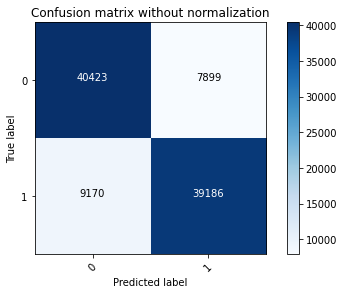

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                      title='Confusion matrix without normalization')
plt.show()

Normalized confusion matrix
[[0.83653408 0.16346592]
 [0.18963521 0.81036479]]

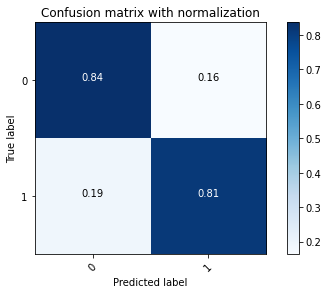

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=True,
                      title='Confusion matrix with normalization')
plt.show()

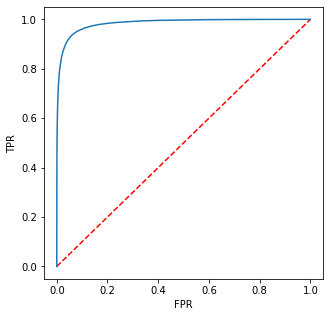

In [0]:
# ROC for the model
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lr_model.summary.roc.select('FPR').collect(),
         lr_model.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [0]:
# lets plot ROC (receiver operating characteristic curve), first some helper function
from pyspark.mllib.evaluation import BinaryClassificationMetrics
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
 warnings.warn(
Out[14]:

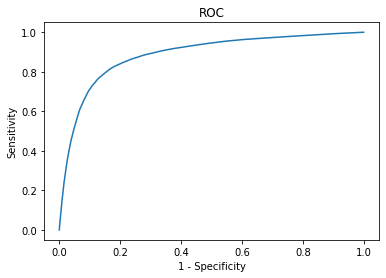

[<matplotlib.lines.Line2D at 0x7faf7c989130>]

In [0]:
    # now the plot
    import matplotlib.pyplot as plt

    # Returns as a list (false positive rate, true positive rate)
    preds = df4.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
    points = CurveMetrics(preds).get_curve('roc')

    plt.figure()
    x_val = [x[0] for x in points]
    y_val = [x[1] for x in points]
    plt.title('ROC')
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.plot(x_val, y_val)